In [47]:
import iris
import matplotlib.pyplot as plt

import iris.plot as iplt
import iris.quickplot as qplt

import numpy
from iris.experimental.regrid import regrid_weighted_curvilinear_to_rectilinear

In [45]:
%matplotlib inline

In [18]:
hfx_file = '/g/data/ua6/DRSv2/CMIP5/NorESM1-M/historical/mon/ocean/r1i1p1/hfx/latest/hfx_Omon_NorESM1-M_historical_r1i1p1_185001-200512.nc'
hfy_file = '/g/data/ua6/DRSv2/CMIP5/NorESM1-M/historical/mon/ocean/r1i1p1/hfy/latest/hfy_Omon_NorESM1-M_historical_r1i1p1_185001-200512.nc'

In [24]:
hfx_cube = iris.load_cube(hfx_file, 'ocean_heat_x_transport')
hfy_cube = iris.load_cube(hfy_file, 'ocean_heat_y_transport')

/g/data/r87/dbi599/miniconda3/envs/ocean/lib/python3.6/site-packages/iris/fileformats/cf.py:1143: IrisDeprecation: NetCDF default loading behaviour currently does not expose variables which define reference surfaces for dimensionless vertical coordinates as independent Cubes. This behaviour is deprecated in favour of automatic promotion to Cubes. To switch to the new behaviour, set iris.FUTURE.netcdf_promote to True.
  warn_deprecated(msg)
/g/data/r87/dbi599/miniconda3/envs/ocean/lib/python3.6/site-packages/iris/fileformats/cf.py:1143: IrisDeprecation: NetCDF default loading behaviour currently does not expose variables which define reference surfaces for dimensionless vertical coordinates as independent Cubes. This behaviour is deprecated in favour of automatic promotion to Cubes. To switch to the new behaviour, set iris.FUTURE.netcdf_promote to True.
  warn_deprecated(msg)


In [25]:
print(hfx_cube)

ocean_heat_x_transport                     (time: 1872; cell index along second dimension: 384; cell index along first dimension: 320)
     Dimension coordinates:
          time                                  x                                        -                                      -
          cell index along second dimension     -                                        x                                      -
          cell index along first dimension      -                                        -                                      x
     Auxiliary coordinates:
          latitude                              -                                        x                                      x
          longitude                             -                                        x                                      x
     Attributes:
          Conventions: CF-1.4
          associated_files: baseURL: http://cmip-pcmdi.llnl.gov/CMIP5/dataLocation gridspecFile: g...
          

In [41]:
print(hfy_cube)

ocean_heat_y_transport                     (time: 1872; cell index along second dimension: 384; cell index along first dimension: 320)
     Dimension coordinates:
          time                                  x                                        -                                      -
          cell index along second dimension     -                                        x                                      -
          cell index along first dimension      -                                        -                                      x
     Auxiliary coordinates:
          latitude                              -                                        x                                      x
          longitude                             -                                        x                                      x
     Attributes:
          Conventions: CF-1.4
          associated_files: baseURL: http://cmip-pcmdi.llnl.gov/CMIP5/dataLocation gridspecFile: g...
          

In [26]:
hfx_cube.coord('cell index along second dimension')

DimCoord(array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179

In [36]:
hfy_cube.coord('cell index along second dimension')

DimCoord(array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179

In [27]:
print(hfx_cube.coord_system())

None


In [28]:
target_grid = iris.coord_systems.GeogCS(iris.fileformats.pp.EARTH_RADIUS)

In [29]:
new_hfx_cube, new_hfy_cube = iris.analysis.cartography.rotate_winds(hfx_cube, hfy_cube, target_grid)

ValueError: Coordinates differ between u and v cubes. Coordinate 'longitude' from u cube does not equal coordinate 'longitude' from v cube.

In [32]:
hfx_cube.coord('longitude').points

array([[ 320.        ,  321.125     ,  322.25      , ...,  316.625     ,
         317.75      ,  318.875     ],
       [ 320.        ,  321.125     ,  322.25      , ...,  316.625     ,
         317.75      ,  318.875     ],
       [ 320.        ,  321.125     ,  322.25      , ...,  316.625     ,
         317.75      ,  318.875     ],
       ..., 
       [ 320.        ,  320.50268555,  321.00500488, ...,  318.49334717,
         318.99502563,  319.49734497],
       [ 320.        ,  320.46920776,  320.93804932, ...,  318.59381104,
         319.0619812 ,  319.53082275],
       [ 320.        ,  320.43301392,  320.86569214, ...,  318.70233154,
         319.13430786,  319.56698608]], dtype=float32)

In [33]:
hfy_cube.coord('longitude').points

array([[ 320.5625    ,  321.6875    ,  322.8125    , ...,  317.1875    ,
         318.3125    ,  319.4375    ],
       [ 320.5625    ,  321.6875    ,  322.8125    , ...,  317.1875    ,
         318.3125    ,  319.4375    ],
       [ 320.5625    ,  321.6875    ,  322.8125    , ...,  317.1875    ,
         318.3125    ,  319.4375    ],
       ..., 
       [ 320.25930786,  320.77767944,  321.29559326, ...,  318.70440674,
         319.22232056,  319.74072266],
       [ 320.24319458,  320.72937012,  321.21502686, ...,  318.78500366,
         319.2706604 ,  319.75683594],
       [ 320.22579956,  320.67721558,  321.12808228, ...,  318.87191772,
         319.32281494,  319.77423096]], dtype=float32)

In [34]:
hfx_cube.coord('latitude').points

array([[-79.22001648, -79.22001648, -79.22001648, ..., -79.22001648,
        -79.22001648, -79.22001648],
       [-78.68577576, -78.68577576, -78.68577576, ..., -78.68577576,
        -78.68577576, -78.68577576],
       [-78.15153503, -78.15153503, -78.15153503, ..., -78.15153503,
        -78.15153503, -78.15153503],
       ..., 
       [ 71.28920746,  71.29109192,  71.29673767, ...,  71.30614471,
         71.29673767,  71.29109192],
       [ 71.73420715,  71.73599243,  71.7413559 , ...,  71.75028229,
         71.7413559 ,  71.73599243],
       [ 72.18502045,  72.18669891,  72.19173431, ...,  72.20011139,
         72.19173431,  72.18669891]], dtype=float32)

In [35]:
hfy_cube.coord('latitude').points

array([[-79.48763275, -79.48763275, -79.48763275, ..., -79.48763275,
        -79.48763275, -79.48763275],
       [-78.95341492, -78.95341492, -78.95341492, ..., -78.95341492,
        -78.95341492, -78.95341492],
       [-78.41919708, -78.41919708, -78.41919708, ..., -78.41919708,
        -78.41919708, -78.41919708],
       ..., 
       [ 71.06924438,  71.07309723,  71.08079529, ...,  71.08079529,
         71.07309723,  71.06924438],
       [ 71.51139069,  71.51506042,  71.52240753, ...,  71.52240753,
         71.51506042,  71.51139069],
       [ 71.95909882,  71.96257019,  71.96950531, ...,  71.96950531,
         71.96257019,  71.95909882]], dtype=float32)

In [37]:
new_hfx_cube, new_hfy_cube = iris.analysis.cartography.rotate_winds(hfx_cube, hfx_cube, target_grid)

In [38]:
print(new_hfx_cube)

transformed_ocean_heat_x_transport / (W) (time: 1872; cell index along second dimension: 384; cell index along first dimension: 320)
     Dimension coordinates:
          time                                x                                        -                                      -
          cell index along second dimension   -                                        x                                      -
          cell index along first dimension    -                                        -                                      x
     Auxiliary coordinates:
          latitude                            -                                        x                                      x
          longitude                           -                                        x                                      x
          projection_x_coordinate             -                                        x                                      x
          projection_y_coordinate          

In [59]:
new_hfx_cube.remove_coord('projection_x_coordinate')
new_hfx_cube.remove_coord('projection_y_coordinate')

In [60]:
print(new_hfx_cube)

transformed_ocean_heat_x_transport / (W) (time: 1872; cell index along second dimension: 384; cell index along first dimension: 320)
     Dimension coordinates:
          time                                x                                        -                                      -
          cell index along second dimension   -                                        x                                      -
          cell index along first dimension    -                                        -                                      x
     Auxiliary coordinates:
          latitude                            -                                        x                                      x
          longitude                           -                                        x                                      x
     Attributes:
          Conventions: CF-1.4
          associated_files: baseURL: http://cmip-pcmdi.llnl.gov/CMIP5/dataLocation gridspecFile: g...
          branch_time:

In [40]:
new_hfx_cube.coord('latitude').shape

(384, 320)

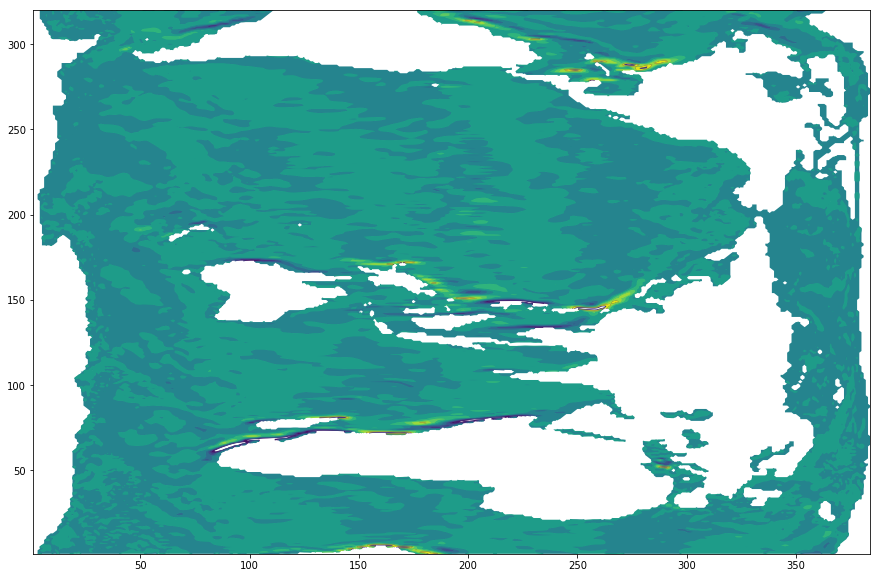

In [74]:
fig = plt.figure(figsize=(15, 10))
plt.subplot(111)
iplt.contourf(hfy_cube[0, ::] / 10**15, levels=[-1, -0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1], extend=True, palette='jet')  #, 15)
iplt.show()

In [48]:
def _check_coord_names(cube, coord_names):
    """Remove specified coordinate name.
    The iris standard names for lat/lon coordinates are:
      latitude, grid_latitude, longitude, grid_longitude
    If a cube uses one for the dimension coordinate and the 
      other for the auxillary coordinate, the 
      regrid_weighted_curvilinear_to_rectilinear method won't work
    Args:
      cube (iris.cube.Cube)
      coord_names(list)
    """

    if 'grid_latitude' in coord_names:
        cube.coord('grid_latitude').standard_name = None
        coord_names = [coord.name() for coord in cube.dim_coords]
    if 'grid_longitude' in coord_names:
        cube.coord('grid_longitude').standard_name = None
        coord_names = [coord.name() for coord in cube.dim_coords]

    return cube, coord_names


def _make_grid(lat_values, lon_values):
    """Make a dummy cube with desired grid."""
       
    latitude = iris.coords.DimCoord(lat_values,
                                    standard_name='latitude',
                                    units='degrees_north',
                                    coord_system=iris.coord_systems.GeogCS(iris.fileformats.pp.EARTH_RADIUS))
    longitude = iris.coords.DimCoord(lon_values,                    
                                     standard_name='longitude',
                                     units='degrees_east',
                                     coord_system=iris.coord_systems.GeogCS(iris.fileformats.pp.EARTH_RADIUS))

    dummy_data = numpy.zeros((len(lat_values), len(lon_values)))
    new_cube = iris.cube.Cube(dummy_data, dim_coords_and_dims=[(latitude, 0), (longitude, 1)])

    new_cube.coord('longitude').guess_bounds()
    new_cube.coord('latitude').guess_bounds()

    return new_cube


def get_grid_res(horiz_shape):
    """Define horizontal resolution of new grid. 
    Calculation makes sure new grid is similar resolution to old grid
    (erring on side of slightly more coarse)
    """

    assert len(horiz_shape) == 2
    orig_npoints = horiz_shape[0] * horiz_shape[1]

    res_options = numpy.array([1.0, 1.5, 2.0, 2.5])
    npoints_ref = numpy.array([181 * 360, 121 * 240, 91 * 180, 73 * 144])

    idx = (numpy.abs(npoints_ref - orig_npoints)).argmin()
    
    new_res = res_options[idx]
    if orig_npoints < npoints_ref[idx]:
        new_res = new_res + 0.5

    new_res = new_res + 0.5  # safety buffer

    print("new horizontal grid resolution =", new_res)

    return new_res


def curvilinear_to_rectilinear(cube):
    """Regrid curvilinear data to a rectilinear grid if necessary."""

    coord_names = [coord.name() for coord in cube.dim_coords]
    aux_coord_names = [coord.name() for coord in cube.aux_coords]
    
    if 'time' in aux_coord_names:
        aux_coord_names.remove('time')

    if aux_coord_names == ['latitude', 'longitude']:

        grid_res = get_grid_res(cube.coord('latitude').shape)

        # Create target grid
        lats = numpy.arange(-90, 90.01, grid_res)
        lons = numpy.arange(0, 360, grid_res)
        target_grid_cube = _make_grid(lats, lons)

        # Interate over slices (experimental regridder only works on 2D slices)
        cube, coord_names = _check_coord_names(cube, coord_names)
        slice_dims = coord_names

        if 'time' in slice_dims:
            slice_dims.remove('time')
        if 'depth' in slice_dims:
            slice_dims.remove('depth')
    
        cube_list = []
        for i, cube_slice in enumerate(cube.slices(slice_dims)):
            weights = numpy.ones(cube_slice.shape)
            cube_slice.coord(axis='x').coord_system = iris.coord_systems.GeogCS(iris.fileformats.pp.EARTH_RADIUS)
            cube_slice.coord(axis='y').coord_system = iris.coord_systems.GeogCS(iris.fileformats.pp.EARTH_RADIUS)
            regridded_cube = regrid_weighted_curvilinear_to_rectilinear(cube_slice, weights, target_grid_cube)
            cube_list.append(regridded_cube)

        new_cube = iris.cube.CubeList(cube_list)
        new_cube = new_cube.merge_cube()
        coord_names = [coord.name() for coord in new_cube.dim_coords]

        regrid_status = True

    else:

        new_cube = cube
        regrid_status = False
    
    return new_cube, coord_names, regrid_status

In [63]:
new_hfx_cube_regrid, coord_names, regrid_status = curvilinear_to_rectilinear(new_hfx_cube)

new horizontal grid resolution = 1.5


In [64]:
print(new_hfx_cube_regrid)

transformed_ocean_heat_x_transport / (W) (time: 1872; latitude: 121; longitude: 240)
     Dimension coordinates:
          time                                x               -               -
          latitude                            -               x               -
          longitude                           -               -               x
     Attributes:
          Conventions: CF-1.4
          associated_files: baseURL: http://cmip-pcmdi.llnl.gov/CMIP5/dataLocation gridspecFile: g...
          branch_time: 255135.0
          cmor_version: 2.5.9
          contact: Please send any requests or bug reports to noresm-ncc@met.no.
          creation_date: 2011-05-18T14:55:34Z
          experiment: historical
          experiment_id: historical
          forcing: GHG, SA, Oz, Sl, Vl, BC, OC
          frequency: mon
          history: 2011-05-18T14:55:33Z altered by CMOR: replaced missing value flag (1e+20)...
          initialization_method: 1
          institute_id: NCC
         

In [76]:
gfdl_file = '/g/data/ua6/DRSv2/CMIP5/GFDL-ESM2M/historical/mon/ocean/r1i1p1/hfx/latest/hfx_Omon_GFDL-ESM2M_historical_r1i1p1_186601-187012.nc'

In [79]:
gfdl_cube = iris.load_cube(gfdl_file, 'ocean_heat_x_transport')

/g/data/r87/dbi599/miniconda3/envs/ocean/lib/python3.6/site-packages/iris/fileformats/cf.py:798: UserWarning: Missing CF-netCDF measure variable 'areacello', referenced by netCDF variable 'hfx'
  warnings.warn(message % (variable_name, nc_var_name))
/g/data/r87/dbi599/miniconda3/envs/ocean/lib/python3.6/site-packages/iris/fileformats/cf.py:1143: IrisDeprecation: NetCDF default loading behaviour currently does not expose variables which define reference surfaces for dimensionless vertical coordinates as independent Cubes. This behaviour is deprecated in favour of automatic promotion to Cubes. To switch to the new behaviour, set iris.FUTURE.netcdf_promote to True.
  warn_deprecated(msg)


In [80]:
print(gfdl_cube)

ocean_heat_x_transport / (W)        (time: 60; grid_latitude: 200; grid_longitude: 360)
     Dimension coordinates:
          time                           x                  -                    -
          grid_latitude                  -                  x                    -
          grid_longitude                 -                  -                    x
     Auxiliary coordinates:
          latitude                       -                  x                    x
          longitude                      -                  x                    x
     Attributes:
          Conventions: CF-1.4
          associated_files: baseURL: http://cmip-pcmdi.llnl.gov/CMIP5/dataLocation gridspecFile: gridspec_ocean_fx_GFDL-ESM2M_historical_r0i0p0.nc...
          branch_time: 58765
          comment: GFDL experiment name = ESM2M-C1_all_historical_HC1. PCMDI experiment name...
          comments: Note: This model output is presented on the model's tripolar grid. The...
          contact: gfdl.c